In [1]:
import lightkurve as lk
%matplotlib inline

In [2]:
tpf=lk.search_targetpixelfile('DD Dra')
tpf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 15,2019,SPOC,120,233539736,0.0
1,TESS Sector 16,2019,SPOC,120,233539736,0.0
2,TESS Sector 17,2019,SPOC,120,233539736,0.0
3,TESS Sector 18,2019,SPOC,120,233539736,0.0
4,TESS Sector 19,2019,SPOC,120,233539736,0.0
5,TESS Sector 20,2019,SPOC,120,233539736,0.0
6,TESS Sector 14,2019,SPOC,120,233539736,0.0
7,TESS Sector 22,2020,SPOC,120,233539736,0.0
8,TESS Sector 23,2020,SPOC,120,233539736,0.0


In [3]:
tpf = tpf[44].download()

In [4]:
tpf.animate()

In [5]:
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

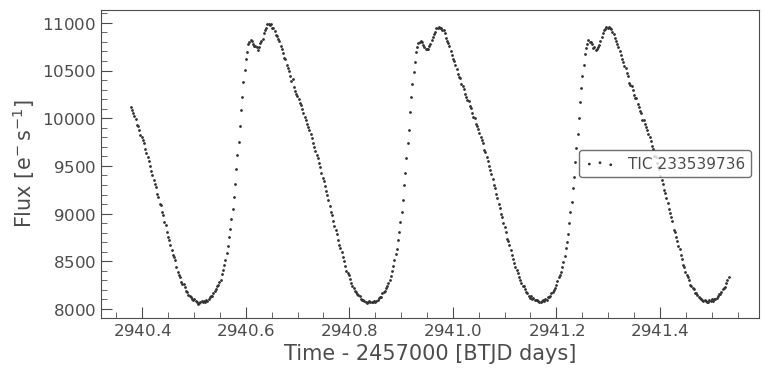

In [6]:
lcp=lc[1500:2000]
lcp.scatter()

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

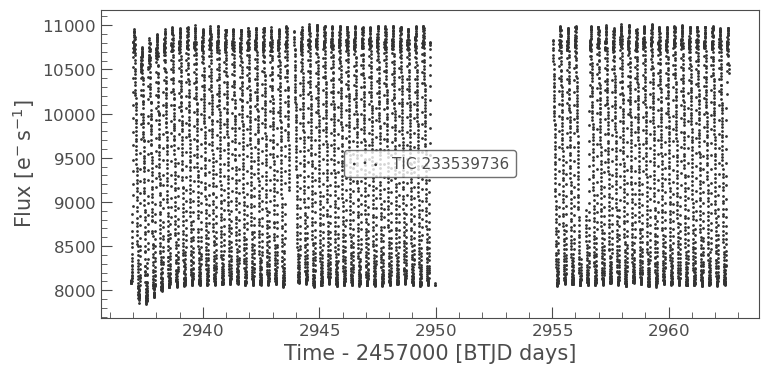

In [7]:
lc.scatter()

In [18]:
pg = lc.to_periodogram(method="ls",minimum_period=0.1,maximum_period=5,oversample_factor=100)

<Axes: xlabel='Period [$\\mathrm{d}$]', ylabel='Power [$\\mathrm{\\frac{e^{-}}{s}}$]'>

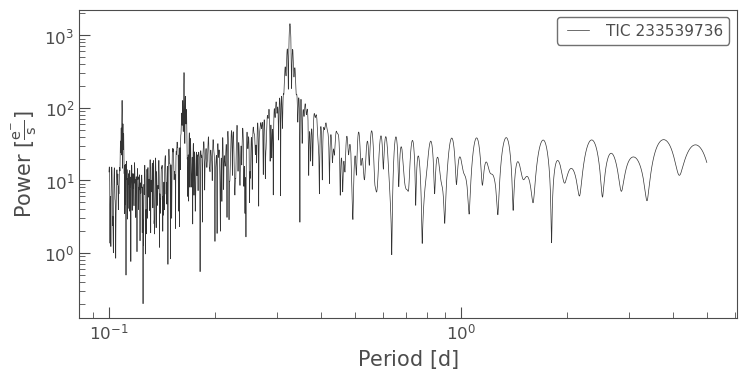

In [19]:
pg.plot(view="period",scale="log")

In [17]:
pg.period_at_max_power

<Quantity 0.32683473 d>

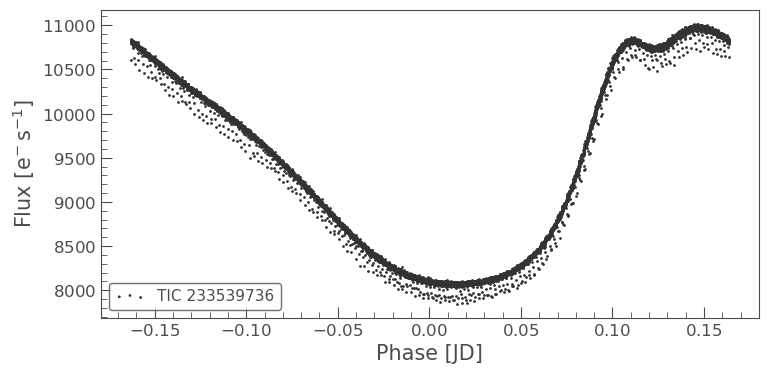

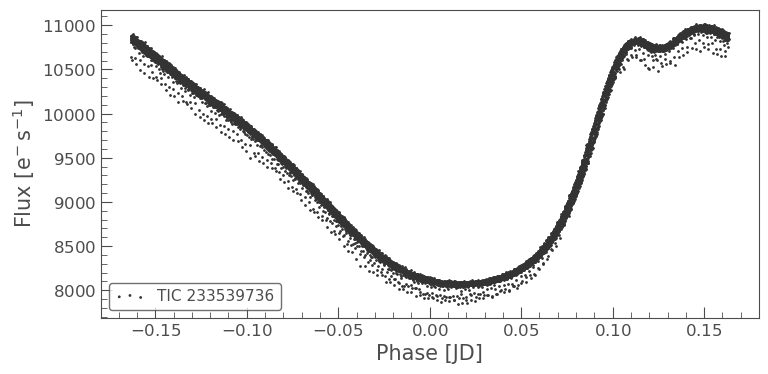

In [18]:
lc.fold(period=pg.period_at_max_power).scatter();
lc.fold(period=0.326793400).scatter();

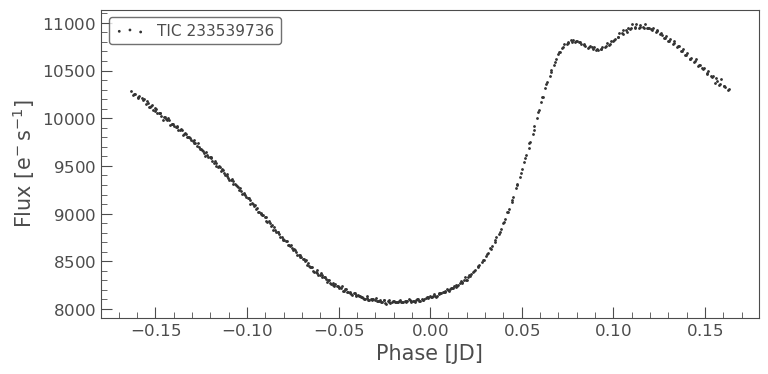

In [19]:
lcp.fold(period=pg.period_at_max_power,epoch_phase=0.5).scatter();